https://moordev.tistory.com/298 => dlib ubuntu install  
conda install -c conda-forge dlib

# Use to dlib
install file directory (shape_predictor_68_face_landmarks.dat)

In [1]:
import dlib

# Load shape_predictor_68_face_landmark.dat

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Load Image

In [7]:
import cv2
path='/home/lab/양창희/Emotion Project/Test_image/test3.jpg'
img=cv2.imread(path)

In [8]:
import matplotlib.pyplot as plt

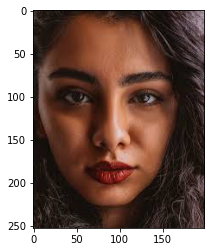

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Image Gray => detector function

In [18]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
rects = detector(img1, 1)

In [28]:
for i, rect in enumerate(rects):
    print("Print_i:{} ".format(i))
    print("Print_rect:{} ".format(rect))
    print("Print_rect.left():{} ".format(rect.left()))
    print("Print_rect.top():{} ".format(rect.top()))
    print("Print_rect.bottom():{} ".format(rect.bottom()))
    print("Print_rect.right():{} ".format(rect.right()))
    print("Print_predictor(img,rect):{} ".format(predictor(img,rect)))
    print("Print_shape.part_x:{} ".format(predictor(img,rect).part(1).x))
    print("Print_shape.part_y:{} ".format(predictor(img,rect).part(1).y))

Print_i:0 
Print_rect:[(-27, 57) (180, 242)] 
Print_rect.left():-27 
Print_rect.top():57 
Print_rect.bottom():242 
Print_rect.right():180 
Print_predictor(img,rect):<_dlib_pybind11.full_object_detection object at 0x7f2109d778b8> 
Print_shape.part_x:1 
Print_shape.part_y:120 


[[1, 99], [1, 120], [4, 143], [10, 164], [20, 184], [35, 201], [53, 215], [71, 226], [91, 229], [109, 225], [126, 212], [141, 198], [153, 181], [163, 162], [169, 142], [172, 122], [173, 102], [15, 76], [29, 69], [47, 69], [63, 74], [77, 81], [104, 79], [120, 73], [136, 71], [151, 73], [162, 81], [92, 101], [92, 117], [92, 134], [92, 150], [74, 157], [83, 161], [91, 163], [100, 160], [108, 157], [33, 101], [44, 96], [56, 97], [67, 105], [55, 106], [43, 106], [113, 106], [123, 98], [135, 98], [145, 103], [137, 107], [125, 108], [61, 185], [72, 179], [83, 175], [91, 178], [100, 176], [110, 180], [120, 184], [110, 194], [100, 200], [91, 201], [82, 200], [72, 196], [66, 185], [83, 185], [91, 186], [100, 185], [114, 184], [100, 185], [91, 187], [83, 186]]


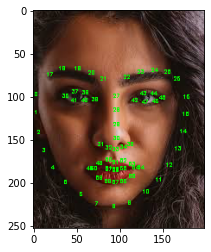

In [29]:
data=[]
for i, rect in enumerate(rects):
    l=rect.left()
    t=rect.top()
    b=rect.bottom()
    r=rect.right()
    shape=predictor(img1,rect)
    for j in range(68):
        x,y=shape.part(j).x,shape.part(j).y
        cv2.putText(img, str(j),(x,y),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.2,(0,255,0))
        data.append([x,y])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(data)

# Data => 1-img => 68 Landmark

In [31]:
import numpy as np
data=np.array(data)

In [32]:
data.shape

(68, 2)

# Make Function

In [37]:
def Landmark_data(imgpath):
    img=cv2.imread(imgpath)
    img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    rects = detector(img1, 1)
    data=[]
    for i, rect in enumerate(rects):
        shape=predictor(img1,rect)
        for j in range(68):
            x,y=shape.part(j).x,shape.part(j).y
            cv2.putText(img, str(j),(x,y),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.2,(0,255,0))
            data.append([x,y])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    data=np.array(data)
    return data

# Test Code

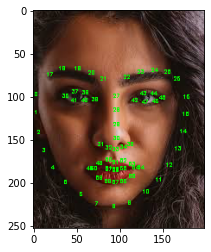

In [38]:
imgpath='/home/lab/양창희/Emotion Project/Test_image/test3.jpg'
dataset=Landmark_data(imgpath)

In [39]:
dataset.shape

(68, 2)